# Connecting to the twitter API

In [71]:
import oauth2 as oauth
import json

In [72]:
with open('config.json') as file:
    tokens = json.loads(file.read())

# read the consumer keys and secret
consumer = oauth.Consumer(key = tokens['CONSUMER_KEY'] , secret = tokens['CONSUMER_SECRET'])

# read the tokens key and secret
token = oauth.Token( key = tokens['ACCESS_TOKEN'] , secret = tokens['ACCESS_SECRET'])

#create a client object
client = oauth.Client(consumer,token)

client

In [73]:
FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'

#twitter handle
screen_name = 'abbiyanaila'

url = FOLLOWERS_URL+'?screen_name='+screen_name

header , response  = client.request(url,method='GET')

In [74]:
print('status:', header['status'])

status: 200


In [75]:
print(response[:600])

b'{"users":[{"id":911893747465629697,"id_str":"911893747465629697","name":"Duygu Burcu A.","screen_name":"duygussarii","location":"","description":"BELONG TO ALLAH\\n\\n\\ud83d\\udccc T\\u00fcrk \\u0130slam Birli\\u011fi savunucusu     \\ud83d\\udccc\\n\\nhttps:\\/\\/t.co\\/n6k3E0C3j9","url":null,"entities":{"description":{"urls":[{"url":"https:\\/\\/t.co\\/n6k3E0C3j9","expanded_url":"http:\\/\\/imanbirligi.blogspot.com","display_url":"imanbirligi.blogspot.com","indices":[56,79]}]}},"protected":false,"followers_count":643,"friends_count":1175,"listed_count":1,"created_at":"Sun Sep 24 10:03:06 +0000 2017","favourit'


# Working with twitter retweet data

In [76]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [77]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.git',
 'twitterAPI.ipynb',
 'retweets.txt',
 'README.md',
 'config.json']

In [78]:
edgelist_txt = 'retweets.txt'
G = nx.read_edgelist(edgelist_txt, create_using=nx.DiGraph())

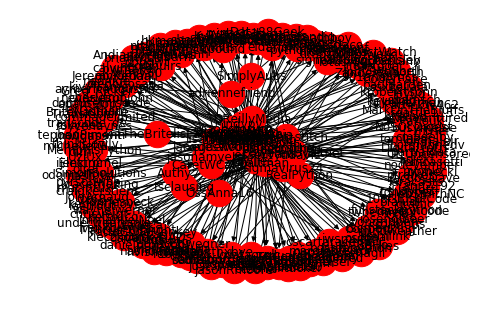

In [86]:
nx.draw(G, with_labels=True,  node_size=700)

In [80]:
LAYOUTS = {
        'circular':nx.circular_layout,
        'fr':nx.fruchterman_reingold_layout,
        'random':nx.random_layout,
        'shell':nx.shell_layout,
        'spectral':nx.spectral_layout,
        'spring':nx.spectral_layout
}

In [81]:
def save_layout(G, layout_name):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >1.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge = [n for n in G.nodes () if n in ['PyTennessee']]
    pos = LAYOUTS[layout_name](G)
    
    print(nlarge)
    #nodes
    nx.draw_networkx_nodes(G, pos, nodelist=nlarge, node_size=1)
    
    #edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='#9999ff')
    
    #labelsM
    labels = {}
    labels['PyTennessee'] = 'PyTennessee'
    nx.draw_networkx_labels(G, pos, labels, font_size=6)
    
    plt.axis('off')
    plt.figure(figsize=(100,90))

['PyTennessee']


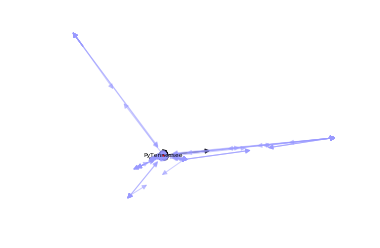

<Figure size 7200x6480 with 0 Axes>

In [88]:
#print the spring layout
save_layout(G, 'spring')

['PyTennessee']


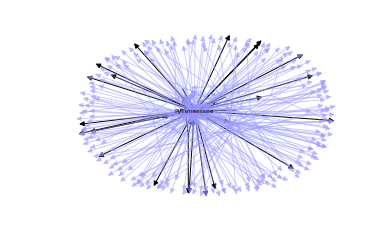

<Figure size 7200x6480 with 0 Axes>

In [83]:
#print the fruchterman layout
save_layout(G, 'fr')

['PyTennessee']


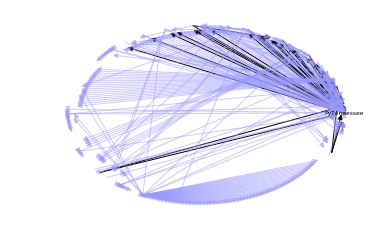

<Figure size 7200x6480 with 0 Axes>

In [85]:
#print the circular layout
save_layout(G, 'circular')

['PyTennessee']


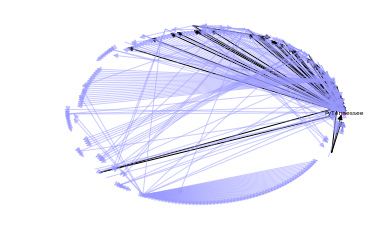

<Figure size 7200x6480 with 0 Axes>

In [89]:
#print the shell layout
save_layout(G, 'shell')

['PyTennessee']


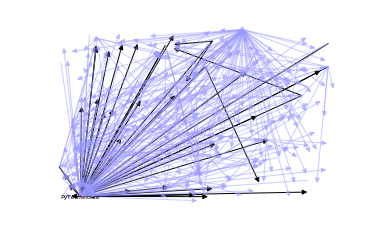

<Figure size 7200x6480 with 0 Axes>

In [92]:
#print the spring layout
save_layout(G, 'random')

# Making networks with Twitter data

In [93]:
#read the files from directory
file = open('list.PyTennessee.json')

#create an empty list
pairs = []

data = json.load(file)

for item in data['users']:
    pairs.append(('PyTennessee', str(item['screen_name'])))

In [95]:
pairs[:20]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember'),
 ('PyTennessee', 'pythonanywhere'),
 ('PyTennessee', 'whitacre'),
 ('PyTennessee', 'adafruit'),
 ('PyTennessee', 'MosaikGlobal'),
 ('PyTennessee', 'nostarch'),
 ('PyTennessee', 'Spotify'),
 ('PyTennessee', 'newrelic'),
 ('PyTennessee', 'JuiceAnalytics'),
 ('PyTennessee', 'SimonSolutions'),
 ('PyTennessee', 'waypaverlabs')]

In [100]:
pairs[-20:]

[('PyTennessee', 'CoderFaire'),
 ('PyTennessee', 'enthought'),
 ('PyTennessee', 'PyNashLadies'),
 ('PyTennessee', 'studionow'),
 ('PyTennessee', 'pycoders'),
 ('PyTennessee', 'coop_geo'),
 ('PyTennessee', 'gvanrossum'),
 ('PyTennessee', 'raymondh'),
 ('PyTennessee', 'geography76'),
 ('PyTennessee', 'pycon'),
 ('PyTennessee', 'mitsuhiko'),
 ('PyTennessee', 'MemphisPython'),
 ('PyTennessee', 'ThePSF'),
 ('PyTennessee', 'nashdevbot'),
 ('PyTennessee', 'planetpython'),
 ('PyTennessee', 'hacknashville'),
 ('PyTennessee', 'byeliad'),
 ('PyTennessee', 'egdelwonk'),
 ('PyTennessee', 'R_Macy'),
 ('PyTennessee', 'jasonamyers')]

In [102]:
import operator
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(),key=operator.itemgetter(1))

/opt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


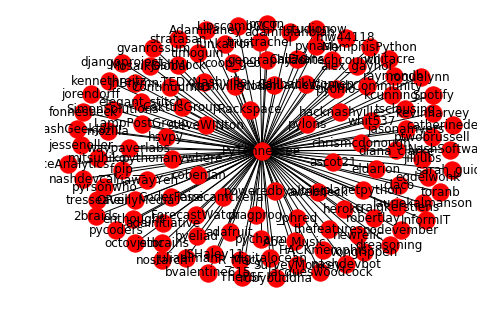

In [103]:
g = nx.Graph()
g.add_edges_from(pairs)

nx.draw(g, with_labels=True)

In [104]:
#centrality : which nodes have the highest /lowest degree centrality

degree_cent = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_cent)

print('----------------------Degree Centrality--------------------------')
print('Highest degree:',degree_sorted[-5:])
print('\n')

print('Lowest degree:',degree_sorted[:5])

----------------------Degree Centrality--------------------------
Highest degree: [('byeliad', 0.008620689655172414), ('egdelwonk', 0.008620689655172414), ('R_Macy', 0.008620689655172414), ('jasonamyers', 0.008620689655172414), ('PyTennessee', 1.0)]


Lowest degree: [('LampPostGroup', 0.008620689655172414), ('octovisinc', 0.008620689655172414), ('nashdevcal', 0.008620689655172414), ('hsvpy', 0.008620689655172414), ('bvalentine615', 0.008620689655172414)]


In [105]:
#betweenness centrality : which nodes have the highest /lowest betweenness centrality

between_cent = nx.betweenness_centrality(g)
between_sorted = centrality_sort(between_cent)

print('----------------------Betwenness Centrality--------------------------')
print('Highest degree:',between_sorted[-5:])
print('\n')

print('Lowest degree:',between_sorted[:5])

----------------------Betwenness Centrality--------------------------
Highest degree: [('byeliad', 0.0), ('egdelwonk', 0.0), ('R_Macy', 0.0), ('jasonamyers', 0.0), ('PyTennessee', 0.9999999999999999)]


Lowest degree: [('LampPostGroup', 0.0), ('octovisinc', 0.0), ('nashdevcal', 0.0), ('hsvpy', 0.0), ('bvalentine615', 0.0)]


In [106]:
#closenness centrality : which nodes have the highest and lowest closeness centrality

closeness_cent = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness_cent)

print('----------------------Closenness Centrality--------------------------')
print('Highest degree:',closeness_sorted[-5:])
print('\n')

print('Lowest degree:',closeness_sorted[:5])

----------------------Closenness Centrality--------------------------
Highest degree: [('byeliad', 0.5021645021645021), ('egdelwonk', 0.5021645021645021), ('R_Macy', 0.5021645021645021), ('jasonamyers', 0.5021645021645021), ('PyTennessee', 1.0)]


Lowest degree: [('LampPostGroup', 0.5021645021645021), ('octovisinc', 0.5021645021645021), ('nashdevcal', 0.5021645021645021), ('hsvpy', 0.5021645021645021), ('bvalentine615', 0.5021645021645021)]


In [107]:
highest_degree = [node[0] for node in degree_sorted[-20:]]

/opt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


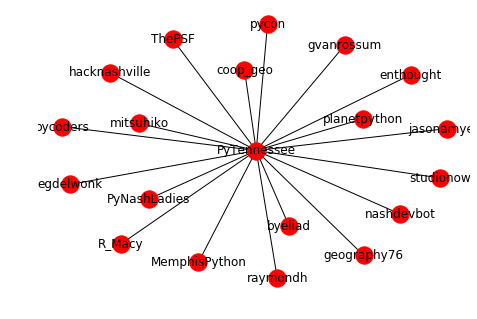

In [108]:
#create a subgraph
sub = g.subgraph(highest_degree)
nx.draw(sub, with_labels=True)

In [109]:
lowest_degree = [node[0] for node in degree_sorted[:20]]

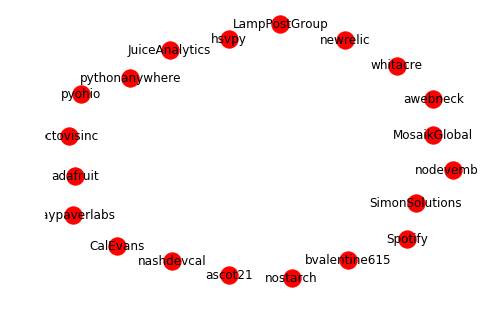

In [110]:
#create a subgraph
sub_low = g.subgraph(lowest_degree)
nx.draw(sub_low, with_labels=True)

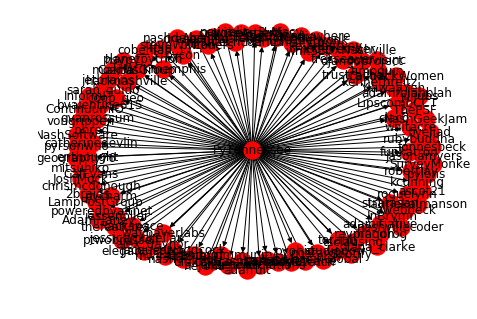

In [113]:
#create a digraph
d = nx.DiGraph()
d.add_edges_from(pairs)

nx.draw(d, with_labels=True)

In [115]:
#get the in_degree_centrality , and out_degree_centrality

in_degree_centrality = nx.in_degree_centrality(d)
in_degree_sorted = centrality_sort(in_degree_centrality)

print('---------------------- in degree Centrality--------------------------')
print('Highest degree:',in_degree_sorted[-5:])
print('\n')

print('Lowest degree:',in_degree_sorted[:5])


#out_degree centrality
out_degree_centrality = nx.out_degree_centrality(d)
out_degree_sorted = centrality_sort(out_degree_centrality)

print('---------------------- out degree Centrality--------------------------')
print('Highest degree:',out_degree_sorted[-5:])
print('\n')

print('Lowest degree:',out_degree_sorted[:5])

---------------------- in degree Centrality--------------------------
Highest degree: [('hacknashville', 0.008620689655172414), ('byeliad', 0.008620689655172414), ('egdelwonk', 0.008620689655172414), ('R_Macy', 0.008620689655172414), ('jasonamyers', 0.008620689655172414)]


Lowest degree: [('PyTennessee', 0.0), ('LampPostGroup', 0.008620689655172414), ('octovisinc', 0.008620689655172414), ('nashdevcal', 0.008620689655172414), ('hsvpy', 0.008620689655172414)]
---------------------- out degree Centrality--------------------------
Highest degree: [('byeliad', 0.0), ('egdelwonk', 0.0), ('R_Macy', 0.0), ('jasonamyers', 0.0), ('PyTennessee', 1.0)]


Lowest degree: [('LampPostGroup', 0.0), ('octovisinc', 0.0), ('nashdevcal', 0.0), ('hsvpy', 0.0), ('bvalentine615', 0.0)]


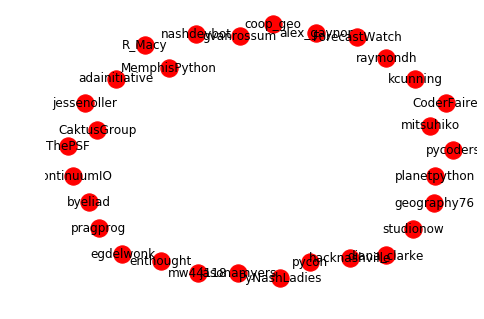

In [134]:
highest_in_degree = [node[0] for node in in_degree_sorted[-30:]]
sub = d.subgraph(highest_in_degree)
nx.draw(sub, with_labels=True)

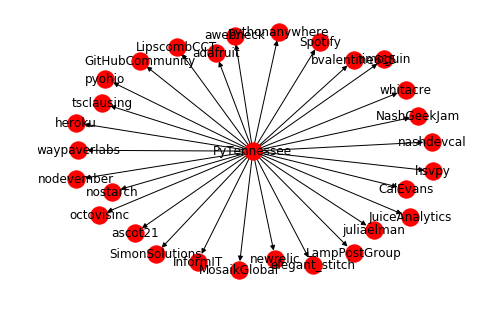

In [133]:
lowest_in_degree = [node[0] for node in in_degree_sorted[:30]]
sub1 = d.subgraph(lowest_in_degree)
nx.draw(sub1, with_labels=True)

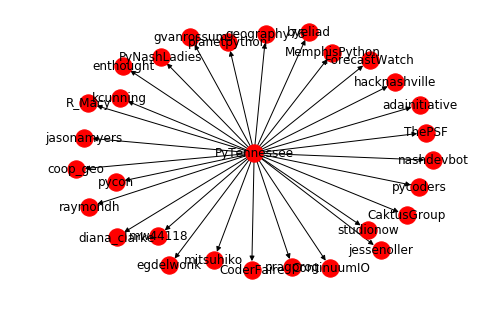

In [132]:
highest_out_degree = [node[0] for node in out_degree_sorted[-30:]]
sub = d.subgraph(highest_out_degree)
nx.draw(sub,with_labels=True)

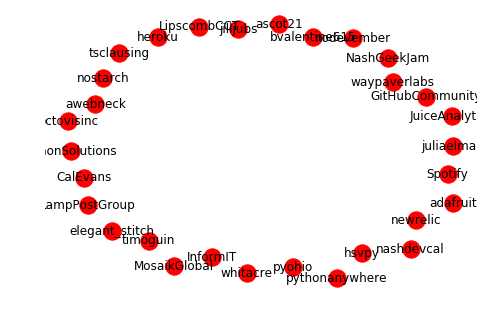

In [131]:
lowest_out_degree = [node[0] for node in out_degree_sorted[:30]]
#plot lowest out degree
sub12 = d.subgraph(lowest_out_degree)
nx.draw(sub12,with_labels=True)